In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 200)
%matplotlib inline

In [3]:
df = pd.read_csv("student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


<AxesSubplot:>

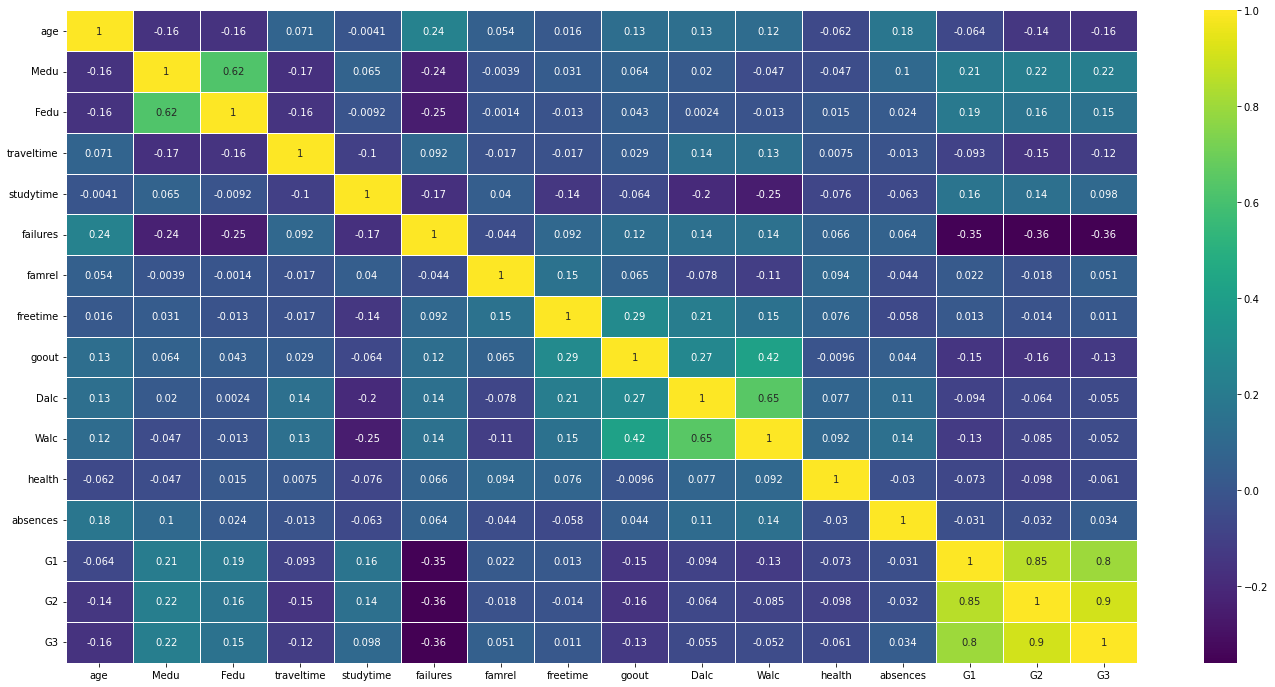

In [3]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

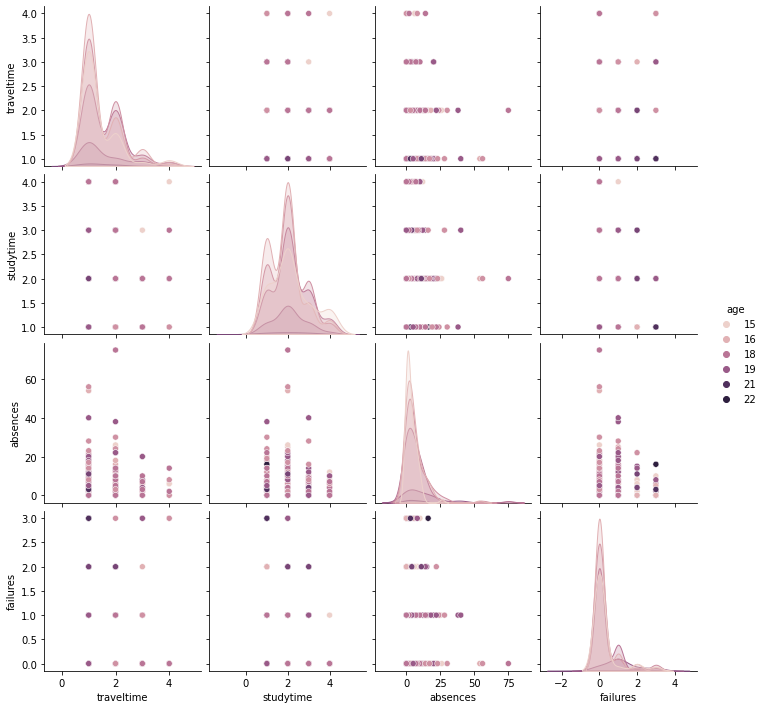

In [4]:
g = sns.pairplot(data=df[["age", "traveltime", "studytime", "absences", "failures"]], hue='age', dropna=True)

In [5]:
yorncolumnlist = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in yorncolumnlist:
    df[col] = df[col].replace({'yes':'1', 'no':'0'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


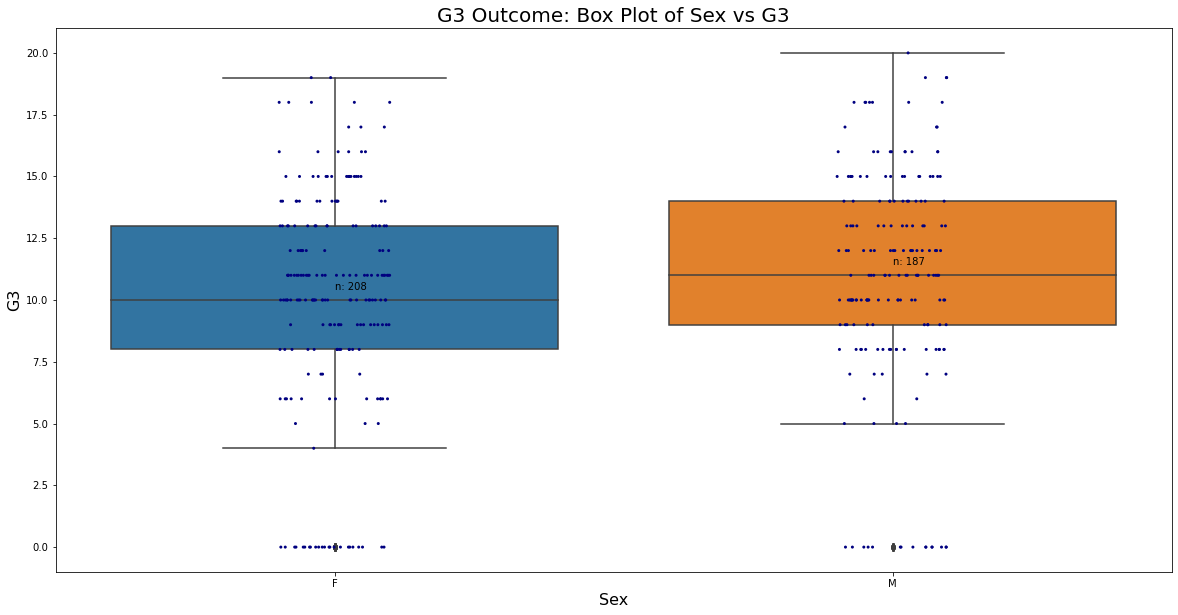

In [6]:
# Create a more robust boxplot to see the distribution of scatters and the number of observations for eact box
f, ax = plt.subplots(figsize=(20,10))

# Starting with a standard boxplot and stripplot with jitters
sns.boxplot(x='sex', y='G3', data=df)
sns.stripplot(x='sex', y='G3', data=df, color='navy', jitter=0.1, size=3.0)

# Calculating the number of obs per group & median to positions labels
medians = df.groupby(['sex'])['G3'].median().values
nobs = df.groupby('sex').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: "+i for i in nobs]

# Adding it to the plot
pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick]+0.4, nobs[tick],
            horizontalalignment='left')
    
# Showing the visualization
plt.title("Bolplot with jitter")
plt.title('G3 Outcome: Box Plot of Sex vs G3', fontsize=20)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('G3', fontsize=16)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'famrel'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

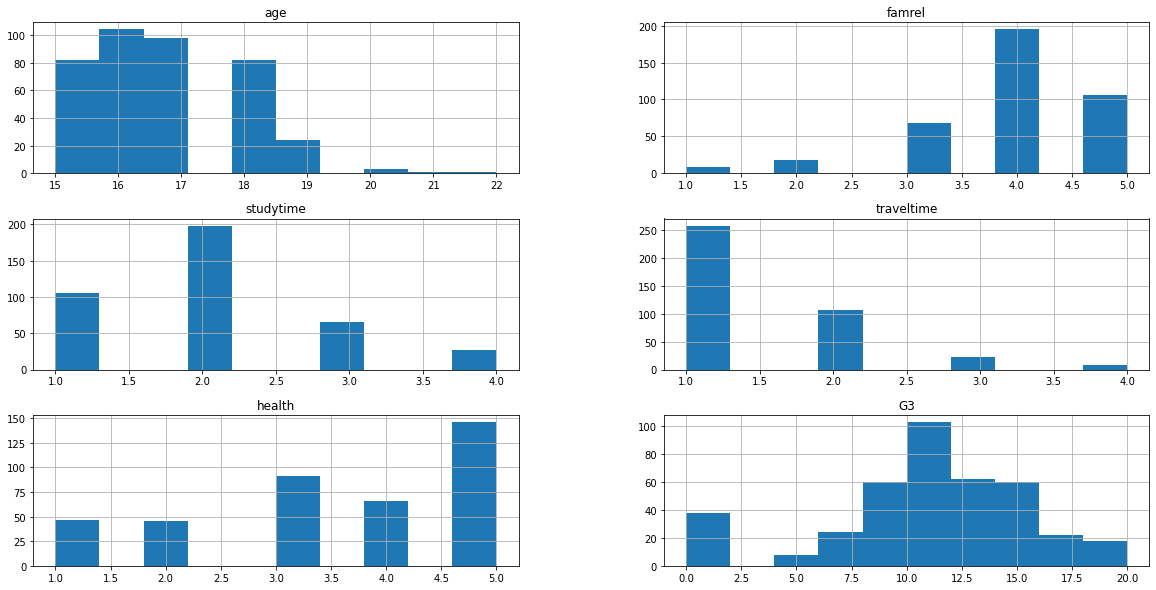

In [9]:
df[[ 'age', 
     'famrel', 
     'studytime', 
     'traveltime',
     'health',
     'G3'
   ]].hist(figsize=(20,10)) # Histogram for all features

<AxesSubplot:>

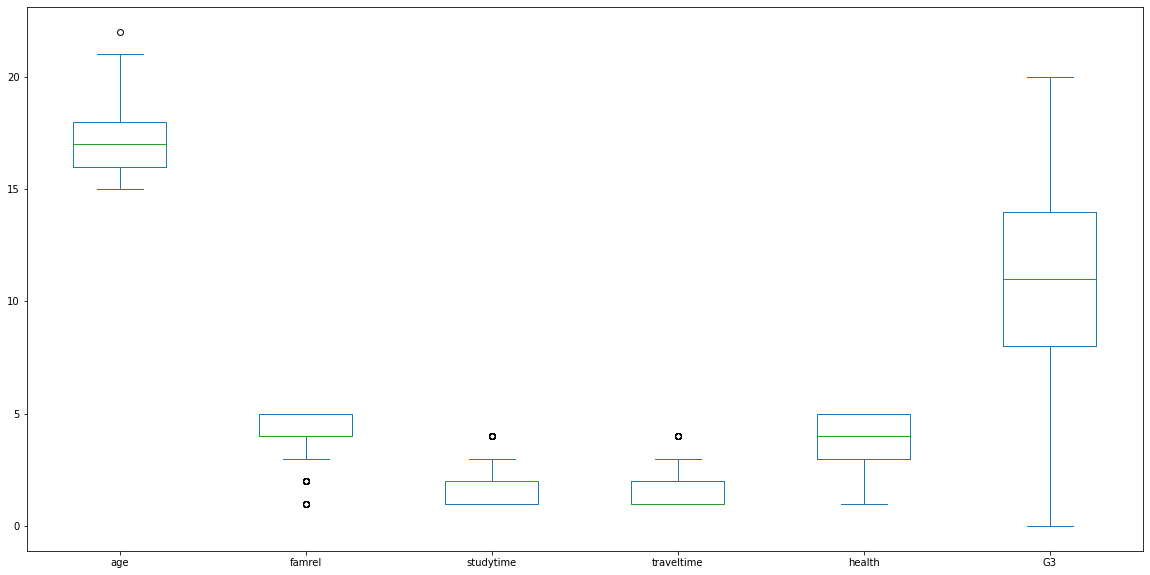

In [10]:
df[['age', 
     'famrel', 
     'studytime', 
     'traveltime',
     'health',
     'G3']].plot(kind='box',figsize=(20,10))

IQR Ranges: green and red lines
Mean: Dotted black line line
Binning Reference Values are: 8.00 ,11.00 , and 14.00


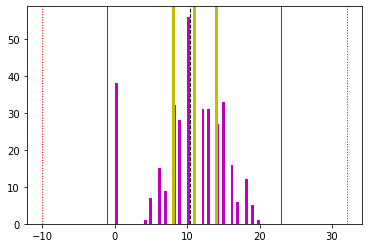

In [11]:
plt.hist(df['G3'],50, color='m')

plt.axvline(df['G3'].mean(), color='k', linestyle='dashed', linewidth=1)

Min, Q1, median, Q3, Max = np.percentile(df['G3'], [0,25,50,75,100])
# Calculate the IQR
IQR = Q3-Q1

# Indicate the inner and outer guides computed from the IQR
# Data outside the inner range guides are outliers
# Data outside the outer range guides are extreme values
inner_range_lower = Q1 - 1.5*IQR
inner_range_upper = Q3 + 1.5*IQR
outer_range_lower = Q1 - 3.0*IQR
outer_range_upper = Q3 + 3.0*IQR


# TO Plot 4 more lines for the inner and outer ranges.
# Make all of them red. 
# Make the inner ranges solid lines
# Make the outer ranges dotted lines

plt.axvline(inner_range_lower, color='g', linestyle='solid', linewidth=1)
plt.axvline(inner_range_upper, color='g', linestyle='solid', linewidth=1)
plt.axvline(outer_range_lower, color='r', linestyle='dotted', linewidth=1)
plt.axvline(outer_range_upper, color='r', linestyle='dotted', linewidth=1)
plt.axvline(Q1, color='y', linestyle='solid', linewidth=3)
plt.axvline(median, color='y', linestyle='solid', linewidth=3)
plt.axvline(Q3, color='y', linestyle='solid', linewidth=3)

plt.rcParams["figure.figsize"] =(16,9)

print(f"IQR Ranges: green and red lines")
print(f"Mean: Dotted black line line")
print(f"Binning Reference Values are: {Q1:.2f} ,{median:.2f} , and {Q3:.2f}")

Begin additional EDA

<AxesSubplot:xlabel='G3', ylabel='Density'>

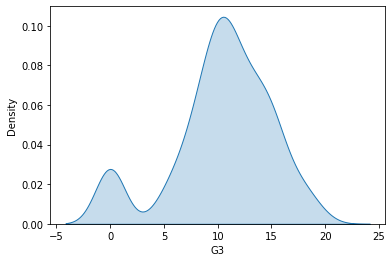

In [4]:
sns.kdeplot(df['G3'], shade=True)

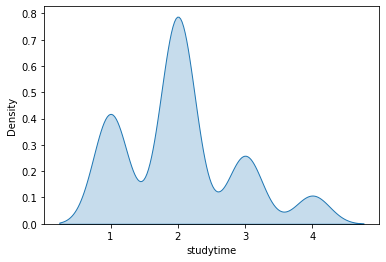

In [8]:
def PlotKdeplot(col):
    sns.kdeplot(df[col], shade=True)

PlotKdeplot('studytime')

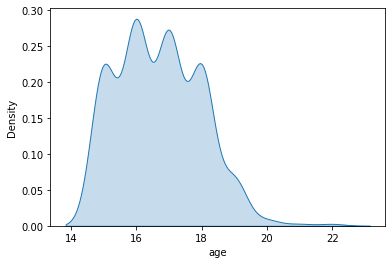

In [9]:
PlotKdeplot('age')